In [9]:
# Exercise 1: Visualizing Trends, Comparisons, and Relationships .
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\vijes\AppData\Local\Temp\ipykernel_16916\936907209.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=10, freq='M'),


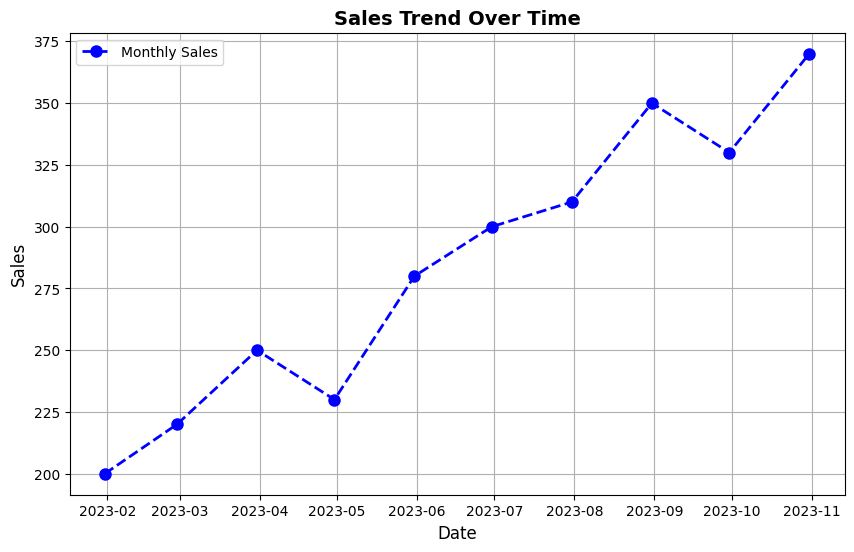

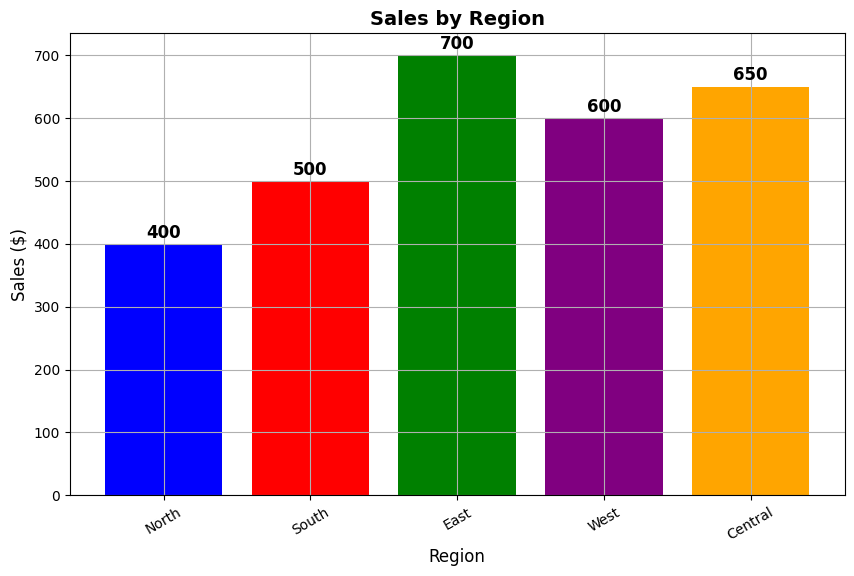

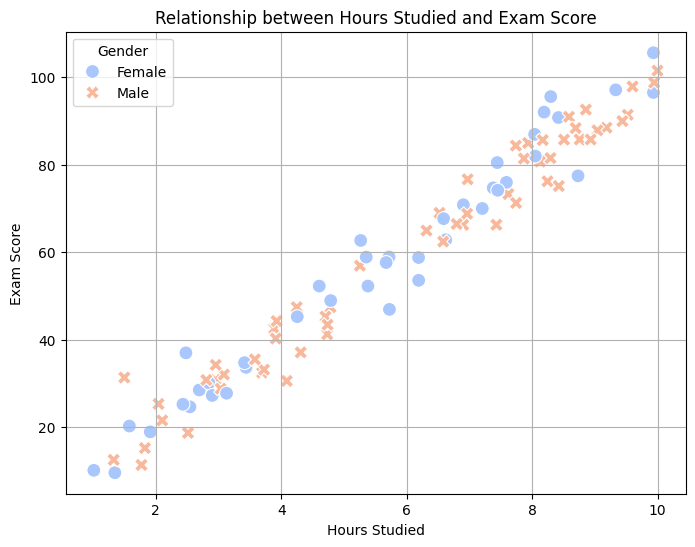

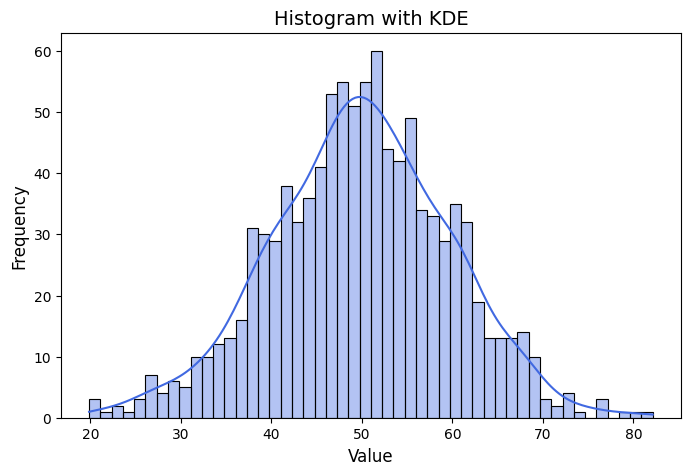

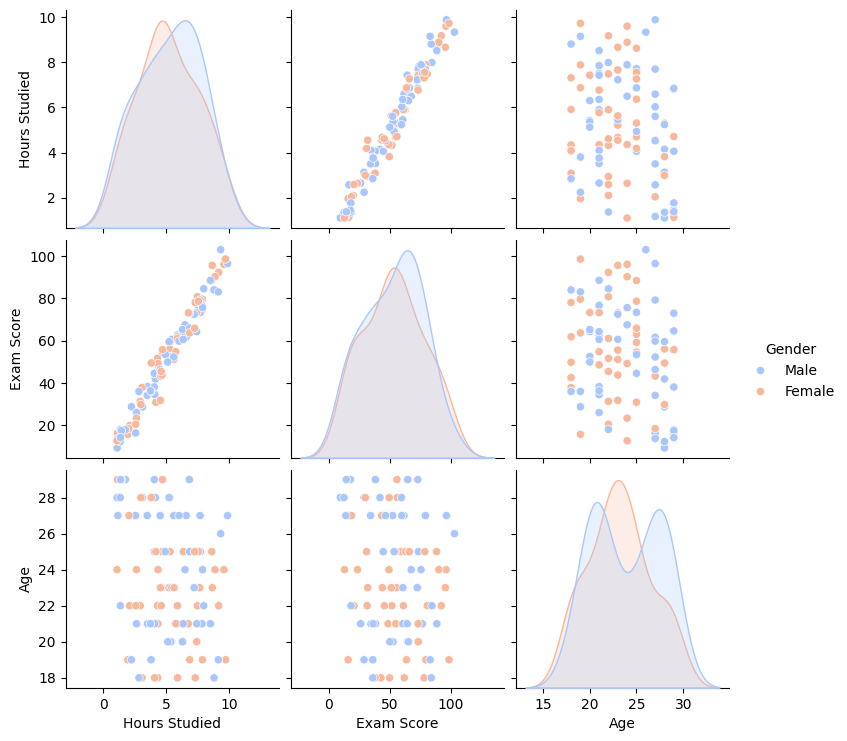

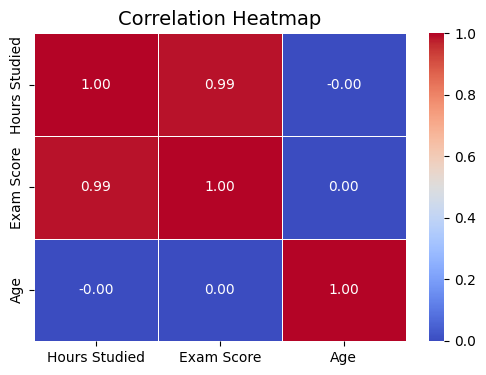

In [23]:
# 1. Line Plot :
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='M'),
    'Sales': [200, 220, 250, 230, 280, 300, 310, 350, 330, 370]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], linestyle='--', marker='o', color='b', markersize=8, linewidth=2, label="Monthly Sales")
plt.title("Sales Trend Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.grid(True)
plt.legend() 
plt.show()

# 2. Bar Plot :
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'],
    'Sales': [400, 500, 700, 600, 650]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Region'], df['Sales'], color=['blue', 'red', 'green', 'purple', 'orange'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10 , 
             f'{bar.get_height()}', ha='center', fontsize=12, fontweight='bold')
plt.title("Sales by Region", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Sales ($)", fontsize=12)
plt.xticks(rotation=30)
plt.grid() 
plt.show()

# 3. Scatter Plot :
num_samples = 100
hours_studied = np.random.uniform(1, 10, num_samples)  # Continuous variable
exam_score = hours_studied * 10 + np.random.normal(0, 5, num_samples)
gender = np.random.choice(['Male', 'Female'], num_samples)
# Create a DataFrame
df = pd.DataFrame({'Hours Studied': hours_studied, 'Exam Score': exam_score, 'Gender': gender})
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Hours Studied', y='Exam Score', hue='Gender', style='Gender', s=100, palette='coolwarm')
# Customize the plot
plt.title("Relationship between Hours Studied and Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend(title="Gender")
plt.grid()
plt.show()

# 4. Histogram & KDE Plot :
# Generate synthetic data (Normally distributed)
data = np.random.normal(loc=50, scale=10, size=1000)  # Mean=50, Std=10
# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(data, kde=True, bins=50, color="royalblue", edgecolor="black", alpha=0.4)
# Labels and title
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Histogram with KDE", fontsize=14)
plt.show()

# 5. Pairplot (Seaborn) :
num_samples = 100
hours_studied = np.random.uniform(1, 10, num_samples)  # Random study hours (1 to 10)
exam_score = hours_studied * 10 + np.random.normal(0, 5, num_samples)  # Exam scores
age = np.random.randint(18, 30, num_samples)  # Random ages between 18-30
gender = np.random.choice(["Male", "Female"], num_samples)  # Random genders
# Create DataFrame
df = pd.DataFrame({
    "Hours Studied": hours_studied,
    "Exam Score": exam_score,
    "Age": age,
    "Gender": gender
})
# Pairplot with hue to distinguish genders
sns.pairplot(df, hue="Gender", diag_kind="kde", palette="coolwarm")
plt.show()

# 6. Heatmap (Seaborn) :
num_samples = 100
hours_studied = np.random.uniform(1, 10, num_samples)
exam_score = hours_studied * 10 + np.random.normal(0, 5, num_samples)
age = np.random.randint(18, 30, num_samples)
# Create DataFrame
df = pd.DataFrame({
    "Hours Studied": hours_studied,
    "Exam Score": exam_score,
    "Age": age
})
# Compute correlation matrix
corr_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [24]:
# Exercise 2 : Comprehensive Data Cleaning .
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# 7. Load and Explore the Dataset :
df = pd.read_csv("C:/Users/vijes/Downloads/ML_s4_LAB/Labsheet3/archive/AmesHousing.csv")
print("First 5 rows of the dataset:")
print(df.head())  
print("\nShape of the dataset (rows, columns):", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types of each column:")
print(df.dtypes)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 8. Handling Missing Values :



First 5 rows of the dataset:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Co

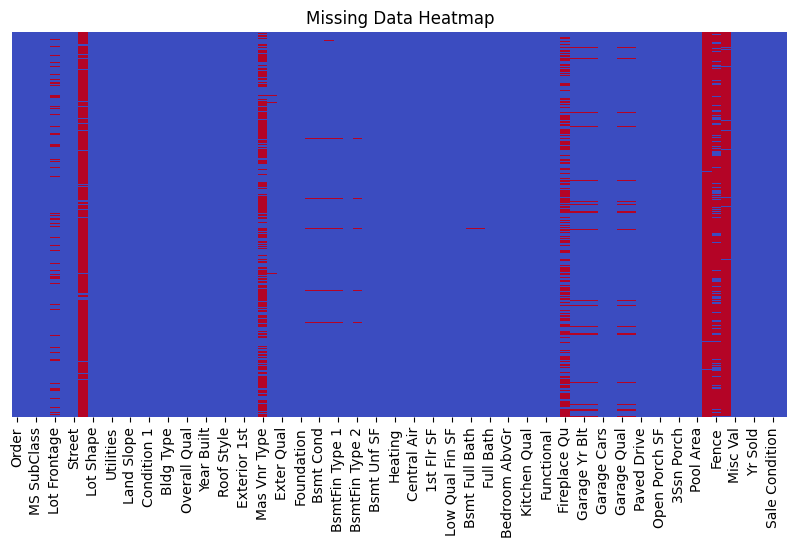

Cleaned dataset saved as 'AmesHousing_Cleaned.csv


In [41]:
# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()
# Drop columns with >40% missing values
df.dropna(thresh=0.6 * len(df), axis=1, inplace=True)
# Impute numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)
# Impute categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)
# Save cleaned dataset
df.to_csv("AmesHousing_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'AmesHousing_Cleaned.csv")
